In [192]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [193]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [194]:
flats = pd.read_csv('flats_cleaned.csv')
houses = pd.read_csv('houses_cleaned.csv')


In [195]:
houses.columns

Index(['rate', 'property_type', 'area', 'bedRoom', 'bathroom', 'balcony',
       'noOfFloor', 'facing', 'sector', 'society_name', 'Price', 'Study_room',
       'Servant_room', 'Pooja_room', 'Other', 'age', 'feature_score',
       'furnish_score'],
      dtype='object')

In [196]:
houses.rename(columns={'noOfFloor':'floor'},inplace=True)

In [197]:
df = pd.concat([flats,houses],ignore_index=True)

In [198]:
df.drop_duplicates(inplace=True)

In [199]:
# df.to_csv('gurgaon_properties.csv',index=False)

In [200]:
# !pip install seaborn

In [201]:
df.sample(4)

,area,property_type,bedRoom,bathroom,balcony,facing,sector,society_name,Price,Study_room,Servant_room,Pooja_room,Other,floor,age,feature_score,furnish_score,rate
679,7789.0,flat,3,3,3,East,Sector 83,emaar palm gardens,1.48,0,1,0,0,7.0,Relatively New,16,0.0,1900.115548
2306,5150.0,flat,2,2,No,NaN,Sector 11,global hill view,0.36,0,0,0,0,15.0,undefined,0,0.0,699.029126
3048,6382.3,house,4,6,3,South-East,Sector 112,experion windchants,7.99,0,1,1,0,2.0,Newly House,23,43.5,12519.000000
735,10162.0,flat,2,2,3,South-East,Sector 88A,godrej oasis,1.19,1,0,1,0,15.0,Relatively New,30,28.5,1171.029325


##  Univariate Analysis

In [202]:
df.area.describe()

count    3.813000e+03
mean     9.626545e+03
std      1.174997e+05
min      4.000000e+00
25%      4.500050e+03
50%      7.174000e+03
75%      9.933000e+03
max      7.250000e+06
Name: area, dtype: float64

In [203]:
q1 = df.area.quantile(0.25)
q2 = df.area.quantile(0.75)
iqr = q2-q1
lower = q1-(1.5*iqr)
higher = q2+(1.5*iqr)

In [204]:
df[(df.area > higher) | (df.area<= lower)].shape

(106, 18)

<Axes: xlabel='area', ylabel='Count'>

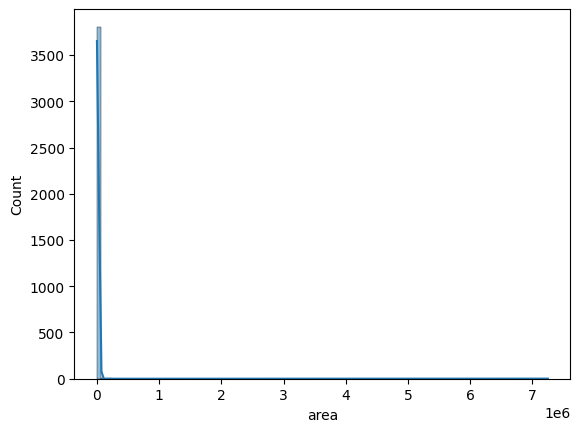

In [205]:
sns.histplot(df.area,kde=True)

In [206]:
df=df[~(df.area<(12*df.area.min()))]

### Here are the Outlier values whose values of area is too small  but the price is too high and they work as outlier in the data so we drop them

In [207]:
# df['area'] = np.log1p(df['area'])

<Axes: xlabel='area', ylabel='Count'>

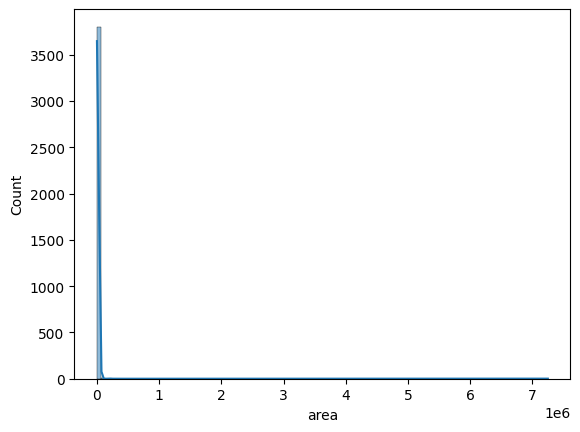

In [208]:
sns.histplot(df.area,kde=True)

<Axes: xlabel='area', ylabel='Price'>

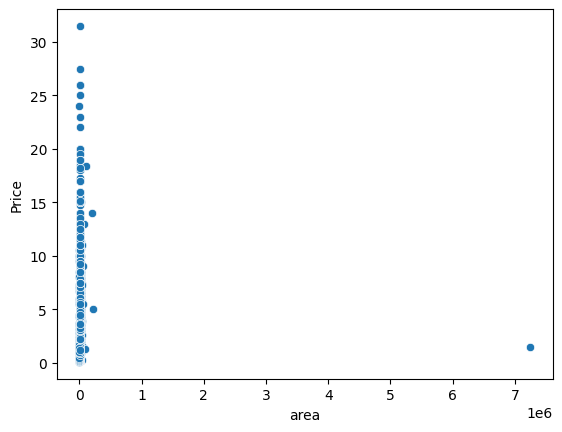

In [209]:
sns.scatterplot(x=df['area'],y=df['Price'])

<Axes: xlabel='property_type', ylabel='count'>

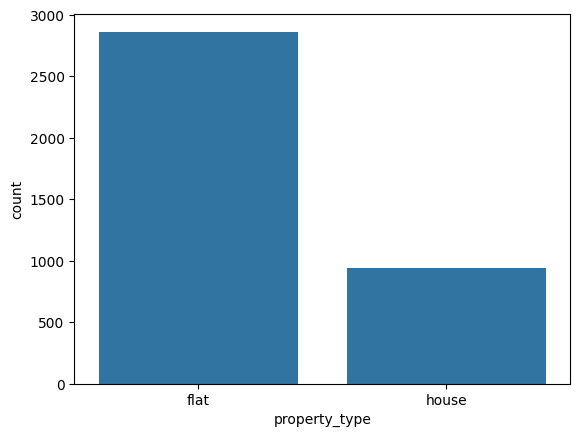

In [210]:
sns.barplot(df.property_type.value_counts())

In [211]:
# !pip install plotly

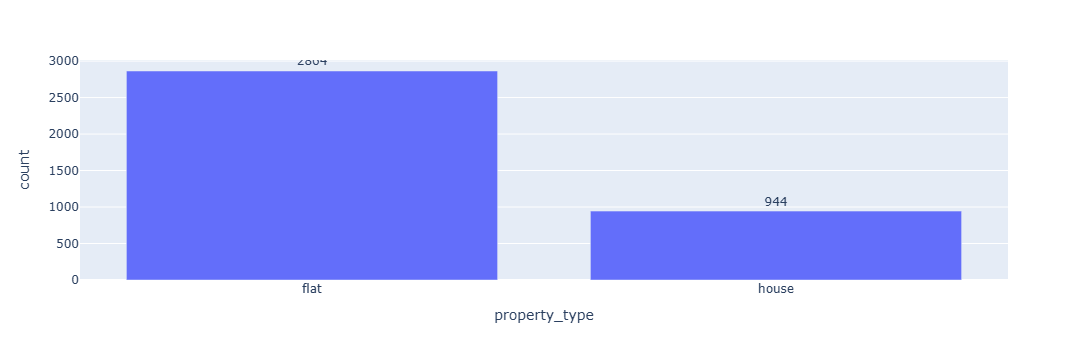

In [212]:
import plotly.express as px

counts = df['property_type'].value_counts().reset_index()
counts.columns = ['property_type', 'count']

fig = px.bar(
    counts,
    x='property_type',
    y='count',
    text='count'
)

fig.update_traces(textposition='outside')
fig.show()

### Observations from the Property Type are:
- There are no missing value of property type
- There are approx 75% flats and rest are houses

In [213]:
df.sample()

,area,property_type,bedRoom,bathroom,balcony,facing,sector,society_name,Price,Study_room,Servant_room,Pooja_room,Other,floor,age,feature_score,furnish_score,rate
3675,3240.01,house,5,6,3+,East,Nirvana Country,unitech espace,10.3,1,1,1,0,3.0,Mid,27,14.0,31790.0


### Observation from the Bedroom and bathroom
- There are no missing value
- We drop those whose value is greater then 16
- We drop those where value of bathroom is 2 greater then bedRoom Because no of bathroom greater than rooms is irrelivance

In [214]:
df.bedRoom.isna().sum()
df.bathroom.isna().sum()

np.int64(0)

In [215]:
df[['bedRoom','bathroom']].describe()

,bedRoom,bathroom
count,3808.000000,3808.000000
mean,3.374737,3.417279
std,2.017408,2.053906
min,1.000000,1.000000
25%,2.000000,2.000000
50%,3.000000,3.000000
75%,4.000000,4.000000
max,36.000000,36.000000


In [216]:
df=df[~(df['bedRoom'] > 16)]

In [217]:
df=df[~(df['bathroom'] > (df['bedRoom']+2))]

<Axes: xlabel='bedRoom'>

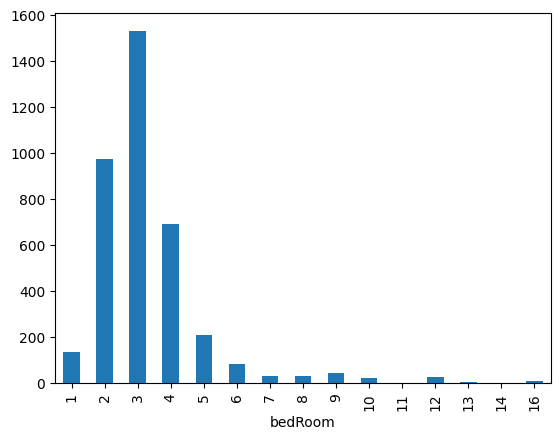

In [218]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='bathroom'>

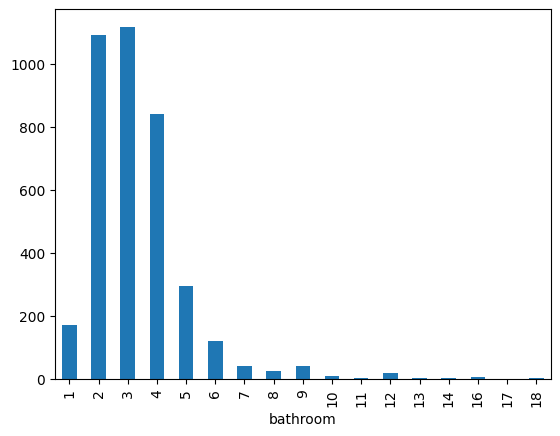

In [219]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

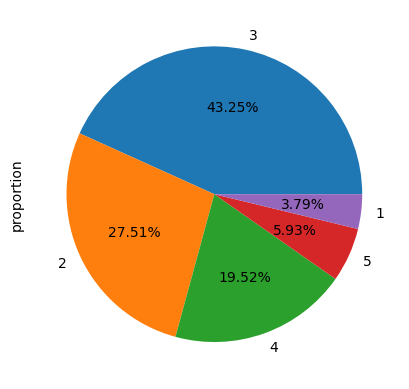

In [220]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

<Axes: ylabel='proportion'>

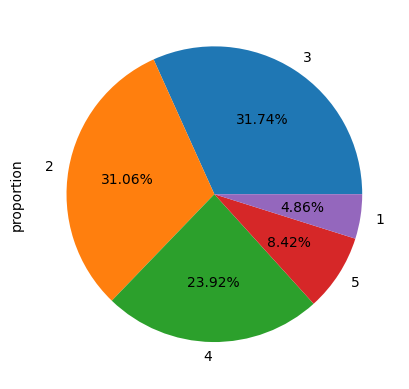

In [221]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

<Axes: >

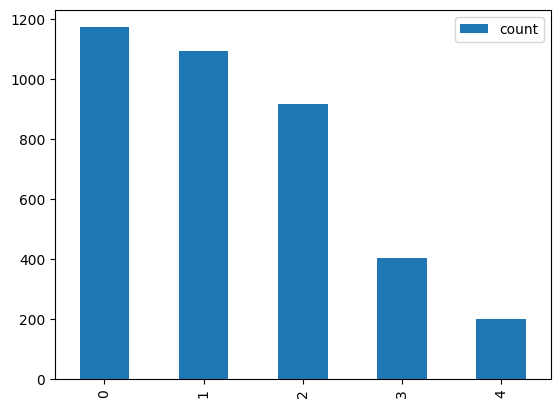

In [222]:
df.balcony.value_counts().reset_index().plot(kind='bar')

In [223]:
df.facing.isna().sum()/df.shape[0]

np.float64(0.29155672823219)

### Facing 
- There are approx 29% missing values
- There are almost 47% data having East and North-East facing
- There approx 38% data from 5 category like South-West,South-East,North-West,South,West

<Axes: ylabel='proportion'>

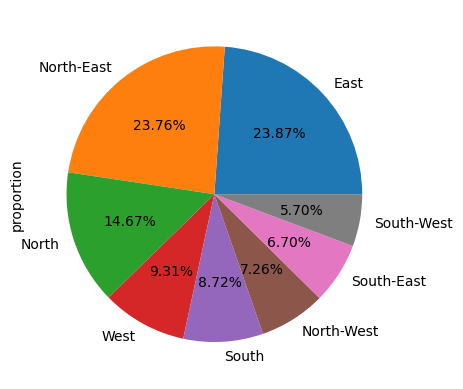

In [224]:
df.facing.value_counts(normalize=True).plot(kind='pie',autopct='%0.2f%%')

In [225]:
df.sector.isna().sum()

np.int64(0)

In [226]:
df.sector=df.sector.str.replace("Sector","").str.replace("-","").str.replace("sector 58","58").str.replace("sector5","5").str.strip()

In [227]:
df.sector.isna().sum()

np.int64(0)

<Axes: xlabel='sector'>

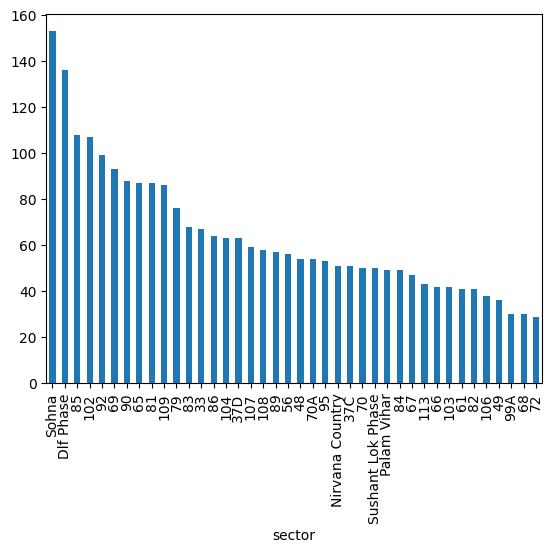

In [228]:
df.sector.value_counts().head(40).plot(kind='bar')

### Sector
- There are 271 different categories
- There are 5 sector Sohna,Dlf Phase,102,85,91 contains 100+ values in each
- We have consider There are too much classes

In [229]:
df.society_name.fillna('independent',inplace=True)

<Axes: xlabel='society_name'>

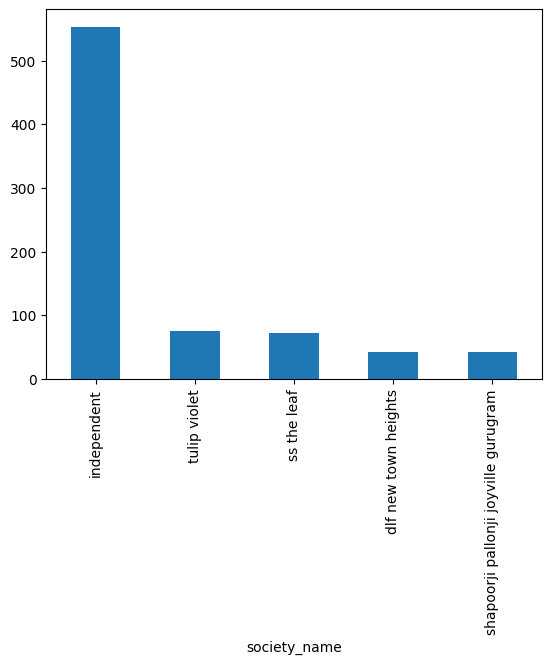

In [230]:
df.society_name.value_counts().head().plot(kind='bar')

## Outlier Detection 

In [231]:
df.Price.describe()

count    3790.000000
mean        2.474031
std         2.897287
min         0.075000
25%         0.920000
50%         1.500000
75%         2.697500
max        31.500000
Name: Price, dtype: float64

<Axes: ylabel='Price'>

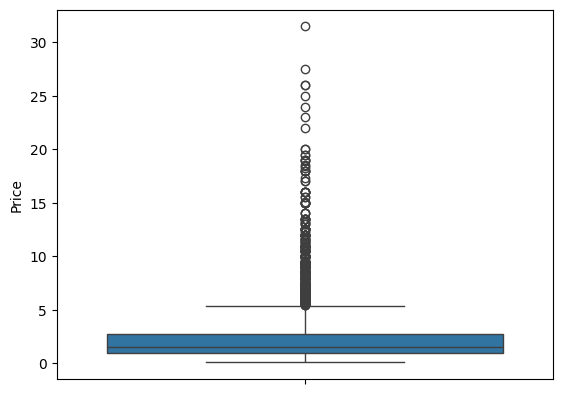

In [232]:
sns.boxplot(df['Price'])

In [233]:
q1 = df.Price.quantile(0.25)
q3 = df.Price.quantile(0.75)
iqr = q3-q1
lower = q1 - (1.5*iqr)
higher = q3 + (1.5*iqr)

In [234]:
def changes(value):
    if value<1000:
        return (9*value)
    else:
        return value

In [235]:
df['area'] = df['area'].apply(changes)

In [236]:
df['rate'] = (df['Price']*10000000)/df['rate']

In [237]:
df = df[~(df.rate > 80000)]

In [238]:
def change2(value):
    if value > 30000:
        return value/9
    else:
        return value

In [239]:
df['area']=df['area'].apply(change2)
df['rate'] = (df.Price*10000000)/df.area

In [240]:
df[df.rate>60000]

,area,property_type,bedRoom,bathroom,balcony,facing,sector,society_name,Price,Study_room,Servant_room,Pooja_room,Other,floor,age,feature_score,furnish_score,rate
3413,1260.00,house,2,1,No,NaN,31,project housing board colony,8.0,0,0,0,0,1.0,undefined,0,3.5,63492.063492
3577,3600.00,house,5,5,2,North-East,54,emaar the palm springs,24.0,1,1,1,0,1.0,Old,23,57.5,66666.666667
3612,3149.99,house,16,16,3+,North-West,Dlf Phase,independent,26.0,1,1,1,0,4.0,Newly House,12,195.5,82539.944571
3738,2250.01,house,4,5,3+,North,54,emaar the palm springs,14.0,1,1,0,0,2.0,Old,27,54.0,62221.945680


<Axes: xlabel='Price', ylabel='Count'>

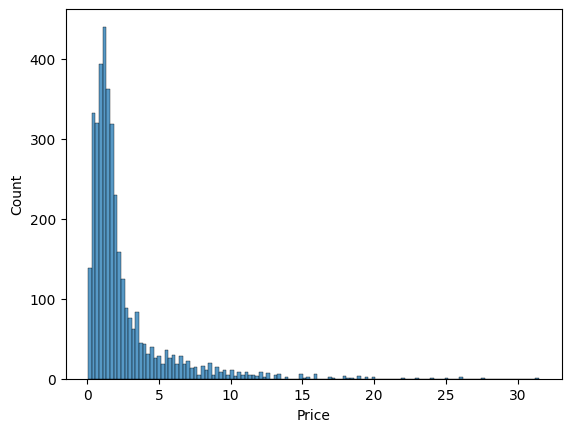

In [241]:
sns.histplot(df['Price'])

### Observations :-
- Here we have the area less than 1000 this is not sqft so we convert them by sq yard to sqft by multiplying by 9
- And we have second mistake which are already in sqft and we again multiply them by 9 so for taking them normal we divide all values which is greater
    then 30000
- Then we again re calculate the rate
- After that we manually check then we find that some outlier which is index 3612
- we again find the iqr and higher value and we obseved that value greater than higher if property type if flat also in the sq yard so we convert them in the sqft
- Here we also a house with index 3180 here property type is in sq yard
- Here we again observed that some houses rate is too small so we make some mistakes so now we have to select whose price is less then 1500 and bedroom are less then 3 then area is in sq yard so change them in sqft and again find the rate 

In [242]:
q1 = df.area.quantile(0.25)
q3 = df.area.quantile(0.75)
iqr = q3-q1
higher = q3+(1.5*iqr)
lower = q1-(1.5*iqr)

In [243]:
df[df.area>higher]

,area,property_type,bedRoom,bathroom,balcony,facing,sector,society_name,Price,Study_room,Servant_room,Pooja_room,Other,floor,age,feature_score,furnish_score,rate
25,18331.00,flat,3,4,2,North-East,65,mm golfestate,6.15,0,0,0,0,20.0,undefined,0,0.0,3354.972451
26,24300.00,flat,3,5,3+,South-East,48,central park resort belgravia residences,6.25,0,1,0,0,5.0,Mid,9,63.0,2572.016461
29,26936.00,flat,2,2,2,NaN,New Palam Vihar,ompee k s residency,1.60,0,0,0,0,1.0,Relatively New,0,0.0,594.000594
107,17617.00,flat,1,1,2,NaN,109,conscient one,1.70,0,0,0,0,9.0,undefined,0,3.5,964.977011
190,17441.00,flat,3,3,No,NaN,Sohna Road,central park flower valley,1.65,0,0,0,0,1.0,undefined,0,0.0,946.046672
206,18492.00,flat,2,2,3,North-East,65,mm heights,2.65,1,0,0,0,4.0,Under Construction,7,14.0,1433.052131
215,18000.00,flat,3,3,3,South-East,65,mm heights,3.00,0,0,0,0,20.0,Under Construction,18,4.0,1666.666667
216,17990.00,flat,3,3,2,NaN,65,mm heights,3.67,0,1,0,0,27.0,Under Construction,8,0.0,2040.022235
218,17997.00,flat,3,3,3,East,65,mm heights,3.29,0,0,0,0,33.0,Under Construction,9,0.0,1828.082458
219,18477.00,flat,2,2,3,North-East,65,mm heights,2.33,0,0,0,0,35.0,Under Construction,9,27.5,1261.027223


In [244]:
def change_major(df):
    mask = (df['area'] >higher) & (df.property_type == 'flat')
    df.loc[mask, 'area'] = df.loc[mask, 'area'] / 9
    df.loc[mask, 'rate'] = (df.loc[mask, 'Price'] * 10000000) / df.loc[mask, 'area']
    return df

In [245]:
new = change_major(df)

In [246]:
new.sample()

,area,property_type,bedRoom,bathroom,balcony,facing,sector,society_name,Price,Study_room,Servant_room,Pooja_room,Other,floor,age,feature_score,furnish_score,rate
3165,6075.18,house,4,4,No,NaN,Subhash Nagar,independent,0.9,0,0,0,0,2.0,undefined,0,0.5,1481.437587


In [247]:
new[new.area>higher]

,area,property_type,bedRoom,bathroom,balcony,facing,sector,society_name,Price,Study_room,Servant_room,Pooja_room,Other,floor,age,feature_score,furnish_score,rate
3107,22498.20,house,9,9,3+,North-East,57,independent,6.25,0,1,0,0,3.0,Newly House,10,57.0,2778.000018
3180,26032.32,house,4,4,2,East,Ashok Vihar Phase I,independent,1.45,0,1,1,0,2.0,Mid,10,13.5,556.999914
3668,20250.37,house,8,7,3+,East,Sushant Lok Phase,independent,5.50,1,1,1,1,3.0,Mid,23,60.5,2715.999757


In [248]:
new.loc[3180, ['area', 'rate']] = [26032.32/9, (1.45*10000000)/(26032.32/9)]

In [249]:
new.area.describe()

count     3785.000000
mean      7251.996663
std       3750.466945
min        450.000000
25%       4590.180000
50%       7065.000000
75%       9393.000000
max      22498.200000
Name: area, dtype: float64

In [250]:
new.Price.describe()

count    3785.000000
mean        2.466704
std         2.881114
min         0.075000
25%         0.920000
50%         1.500000
75%         2.680000
max        31.500000
Name: Price, dtype: float64

In [251]:
new.rate.describe()

count     3785.000000
mean      6054.784874
std       9775.116997
min        183.221427
25%       1341.975534
50%       1918.888082
75%       3400.110274
max      82539.944571
Name: rate, dtype: float64

In [252]:
new.loc[3500, ['area', 'rate']] = [7095.24/9, (0.13*10000000)/(7095.24/9)]

In [253]:
new[new.rate < 1500]

,area,property_type,bedRoom,bathroom,balcony,facing,sector,society_name,Price,Study_room,Servant_room,Pooja_room,Other,floor,age,feature_score,furnish_score,rate
0,5000.000000,flat,2,2,1,West,Krishna Colony,maa bhagwati residency,0.4500,0,0,0,0,4.0,Relatively New,5,7.0,900.000000
1,7692.000000,flat,2,2,1,West,Ashok Vihar,apna enclave,0.5000,0,0,0,0,1.0,Old,5,18.5,650.026001
2,6722.000000,flat,2,2,3,NaN,Sohna,tulsiani easy in homes,0.4000,0,0,0,0,12.0,Newly House,16,0.0,595.060994
3,12250.000000,flat,2,2,2,NaN,61,smart world orchard,1.4700,1,0,0,0,2.0,Under Construction,18,0.0,1200.000000
4,5204.000000,flat,2,2,3,NaN,92,parkwood westend,0.7000,1,0,0,0,5.0,Under Construction,0,0.0,1345.119139
5,6269.000000,flat,2,2,3,NaN,36,signature global infinity mall,0.4100,0,0,0,0,3.0,undefined,0,0.0,654.011804
8,8148.000000,flat,2,4,3+,North-East,88B,vatika xpressions,1.1000,1,0,0,0,2.0,Under Construction,18,0.0,1350.024546
10,9767.000000,flat,2,2,2,NaN,81,signature global city,0.9600,0,0,0,0,1.0,Under Construction,9,0.0,982.901607
11,5587.000000,flat,2,2,1,NaN,Sohna,hcbs sports ville,0.2900,0,0,0,0,4.0,Relatively New,8,0.0,519.062108
13,6859.000000,flat,2,2,3+,South-East,33,godrej,0.9500,0,0,0,0,3.0,Under Construction,0,0.0,1385.041551


In [254]:
# q1 = new.rate.quantile(0.25)
# q2 = new.rate.quantile(0.75)
# iqr = q2-q1
# high = q2+(1.5*iqr)
# low = q1-(1.5*iqr)
# low,high

In [255]:
def changes(df):
    mask = (df.rate < 1500 ) & (df.bedRoom > 3)
    df.loc[mask,'area'] = df.loc[mask,'area']/9
    df.loc[mask,'rate'] = (df.loc[mask, 'Price'] * 10000000) / df.loc[mask, 'area']
    return df

In [256]:
new2 = changes(new)

In [257]:
new2.shape

(3785, 18)

In [258]:
new2[['area','rate','Price']].describe()

,area,rate,Price
count,3785.000000,3785.000000,3785.000000
mean,7160.734277,6181.593705,2.466704
std,3817.542445,9771.347394,2.881114
min,360.030000,250.000000,0.075000
25%,4500.000000,1360.044110,0.920000
50%,6999.900000,1943.005181,1.500000
75%,9370.000000,4200.112003,2.680000
max,22498.200000,82539.944571,31.500000


In [259]:
new2[new2.area<900]

,area,property_type,bedRoom,bathroom,balcony,facing,sector,society_name,Price,Study_room,Servant_room,Pooja_room,Other,floor,age,feature_score,furnish_score,rate
80,711.000000,flat,2,2,1,NaN,86,pyramid elite,0.4600,0,0,0,0,0.0,Under Construction,5,0.0,6469.760900
1304,477.000000,flat,2,2,1,North-West,95,ramsons kshitij,0.2450,0,0,0,1,10.0,Relatively New,8,0.0,5136.268344
1307,540.000000,flat,2,2,1,South-West,95,rof ananda,0.3300,0,0,0,0,13.0,Relatively New,7,0.0,6111.111111
1308,522.000000,flat,3,2,1,North,95,rof ananda,0.3800,0,0,0,0,12.0,Relatively New,9,0.0,7279.693487
1309,549.000000,flat,1,1,1,North,95,rof ananda,0.2100,0,0,0,0,13.0,Relatively New,14,0.0,3825.136612
1430,513.000000,flat,1,1,2,North-West,Sohna,signature the serenas,0.2800,1,0,0,0,1.0,Relatively New,7,0.0,5458.089669
2333,522.000000,flat,2,2,2,East,95,rof ananda,0.3750,1,0,0,0,10.0,Newly House,5,0.0,7183.908046
2972,803.777778,flat,4,2,3+,NaN,Dlf Phase,chanderlok society,0.9000,0,0,0,0,1.0,Old,0,0.0,11197.124689
3101,603.000000,house,2,2,1,West,Laxman Vihar Phase,independent,0.5800,0,0,1,1,2.0,Mid,1,4.5,9618.573798
3102,630.000000,house,1,1,1,South-East,Laxman Vihar Phase,independent,0.6500,0,0,0,1,1.0,Mid,3,4.5,10317.460317


In [260]:
def changes(df):
    mask = (df.area < 500 ) & (df.bedRoom > 3)
    df.loc[mask,'area'] = df.loc[mask,'area']*9
    df.loc[mask,'rate'] = (df.loc[mask, 'Price'] * 10000000) / df.loc[mask, 'area']
    return df

In [261]:
new3 = changes(new2)

In [262]:
new3[['area','rate','Price']].describe()

,area,rate,Price
count,3785.000000,3785.000000,3785.000000
mean,7172.852934,6150.352866,2.466704
std,3801.801066,9772.465817,2.881114
min,450.000000,250.000000,0.075000
25%,4500.000000,1350.228500,0.920000
50%,6999.900000,1931.141028,1.500000
75%,9370.000000,3888.888889,2.680000
max,22498.200000,82539.944571,31.500000


In [263]:
new3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3785 entries, 0 to 3940
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           3785 non-null   float64
 1   property_type  3785 non-null   object 
 2   bedRoom        3785 non-null   int64  
 3   bathroom       3785 non-null   int64  
 4   balcony        3785 non-null   object 
 5   facing         2681 non-null   object 
 6   sector         3785 non-null   object 
 7   society_name   3785 non-null   object 
 8   Price          3785 non-null   float64
 9   Study_room     3785 non-null   int64  
 10  Servant_room   3785 non-null   int64  
 11  Pooja_room     3785 non-null   int64  
 12  Other          3785 non-null   int64  
 13  floor          3766 non-null   float64
 14  age            3785 non-null   object 
 15  feature_score  3785 non-null   int64  
 16  furnish_score  3785 non-null   float64
 17  rate           3785 non-null   float64
dtypes: float64(5)

In [264]:
# new2.facing.fillna('Not known',inplace = True)

In [265]:
# new2.info().

In [266]:
new3.to_csv('eda_outlier.csv',index=False)

In [267]:
new3.sector.values_counts()

AttributeError: 'Series' object has no attribute 'values_counts'